<function walls at 0x0000028424BA59D0>


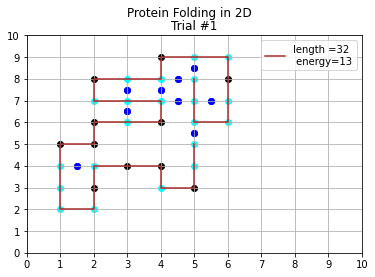

HHPHPPHPHHHHPPPHPHHHPHHPHHPHHHHH
<function walls at 0x0000028424BA59D0>


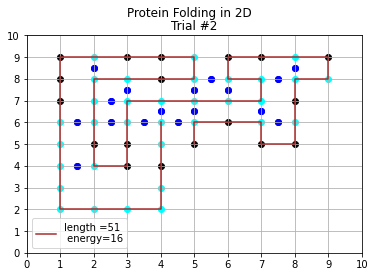

PHPHPPHPHHPHPPHHHHHHHHPPHPHHHHPHHPPHPPPHHHHHHHHHPHH
<function walls at 0x0000028424BA59D0>


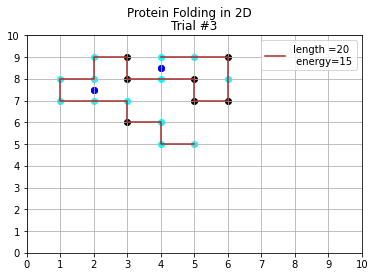

HHHPHHHHHHPPHPPPHPHH
<function walls at 0x0000028424BA59D0>


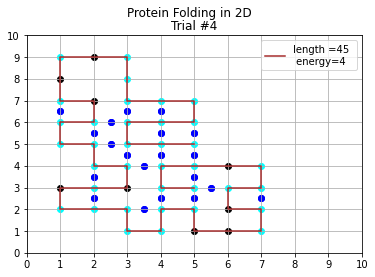

HHHHHHHHHHHPHPHPHHHHHHPHPHHHHHHHPPHHPHHHPHHHH
<function walls at 0x0000028424BA59D0>


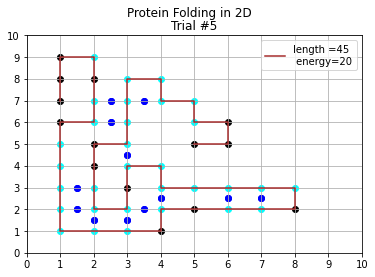

PPPHHHHHHHHPPHHHPHHHHHHHPHHPHPHHHHHHHPHHPHPPP
<function walls at 0x0000028424BA59D0>


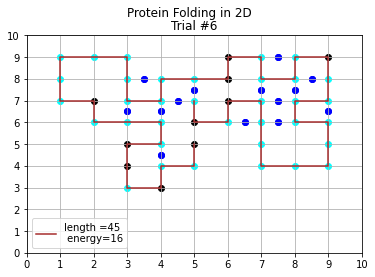

PHHPHPPHHHHPHHHHHHHHHHPPHHHHPHHHHHHHHHHHHPHPH
<function walls at 0x0000028424BA59D0>


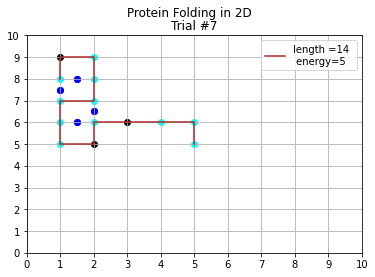

HHHPHPHHHHHHPH
<function walls at 0x0000028424BA59D0>


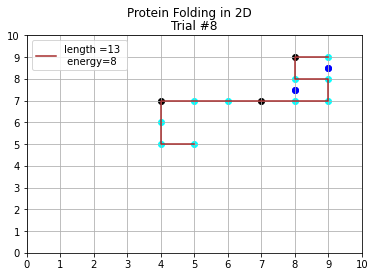

HHHPHHPHHHHPH
<function walls at 0x0000028424BA59D0>


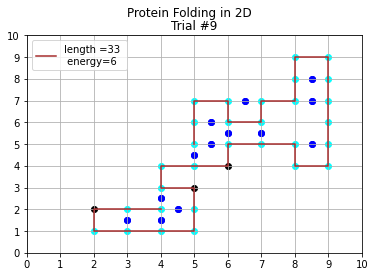

HHHHHHHHHHHHHHHHHHHHPHHHPHHHHHPHH
<function walls at 0x0000028424BA59D0>


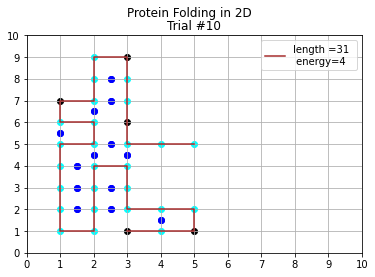

HHHPHHPHHHPHHHHHHHHHHHHHHHHHPHP


In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

all_length = []
all_energy = []

def get_possible_directions(point):
    
    directions = [
        (point[0]+1, point[1]),  # right
        (point[0]-1, point[1]),  # left
        (point[0], point[1]+1),  # forward
        (point[0], point[1]-1),  # backward
    ]
    return directions

def walls(w):
    
    x = np.linspace(0,w,w+1)
    zero = np.zeros(w)
    W_arr = w*np.ones(w)
    
    left_wall = list(zip(x,zero))
    right_wall = list(zip(W_arr,x))
    top_wall = list(zip(x,W_arr))
    bottom_wall = list(zip(zero,x))
    
    wall = left_wall + right_wall + top_wall + bottom_wall
    
    return wall

def random_walk_2D(n,w):
    
    nsteps = range(n)
    current_position = (w/2, w/2)
    visited_points = []
    
    for _ in nsteps:
        visited_points.append(current_position)
        all_directions = get_possible_directions(current_position)
        not_visited_directions = [direction for direction in all_directions if direction not in visited_points
                                 if direction not in walls(w)]
        
        if len(not_visited_directions) >=1:
            current_position = random.choice(not_visited_directions)
        
        else:
            break        
    
    xp, yp = zip(*visited_points)
    
    return xp, yp, visited_points, w

trial_num = []
seq_all = []
benchmark_seq = []

for l in range(10):
    x, y, vispoint, w = random_walk_2D(100,10) #(iterations n, wall size w)

    Hx = []
    Hy = []
    Px = []
    Py = []
    
    seq = ""

    for _ in range(len(x)):
        if random.random()>0.25:
            Hx.append(x[_])
            Hy.append(y[_])
            seq += 'H'
            
        else:
            Px.append(x[_])
            Py.append(y[_])
            seq += 'P'
            
    seq_all.append(seq)
    
    H = list(zip(Hx,Hy))
    hh_dot = []
    print(walls)
    m = len(x)
    
    for i in range(m):
        directions = get_possible_directions(vispoint[i])
        if vispoint[i] in H:
            for j in range(len(directions)):
                if directions[j] in H:
                    if vispoint[i] == vispoint[m-1]:
                        if directions[j] != vispoint[i-1]:
                            hh_dot.append(((vispoint[i][0] + directions[j][0])/2,(vispoint[i][1] + directions[j][1])/2)) 
                    else:
                        if directions[j] != vispoint[i+1] and directions[j] != vispoint[i-1]:
                            hh_dot.append(((vispoint[i][0] + directions[j][0])/2,(vispoint[i][1] + directions[j][1])/2))                                    
    if len(hh_dot) != 0:
        
        hh_energy = set(hh_dot)
        total_energy = (m - 1) - 2 * len(hh_energy)
        hhx, hhy = zip(*hh_dot)
        plt.plot(x, y, label = 'length ={} \n energy={}'.format(m,total_energy), color='brown')
        plt.legend(loc = 'best')
        trial_num.append(l+1)
        plt.title('Trial #{}'.format(trial_num[l]))
        plt.suptitle('Protein Folding in 2D')
        plt.scatter(hhx, hhy, color = 'blue')
        plt.scatter(Hx, Hy, color = 'cyan')
        plt.scatter(Px, Py, color = 'black')
        plt.xticks(np.arange(0, w+1))
        plt.yticks(np.arange(0, w+1))
        plt.xlim([0, w])
        plt.ylim([0, w])
        plt.grid()
        plt.show()
        print(seq)
        all_length.append(m)
        all_energy.append(total_energy)
        
        if len(Hx) == 10 and len(Px) == 10:
            benchmark_seq.append((trial_num[l], m, total_energy, seq))
            
        if len(Hx) == 10 and len(Px) == 14:
            benchmark_seq.append((trial_num[l], m, total_energy, seq))
            
        if len(Hx) == 9 and len(Px) == 16:
            benchmark_seq.append((trial_num[l], m, total_energy, seq))
            
        if len(Hx) == 16 and len(Px) == 20:
            benchmark_seq.append((trial_num[l], m, total_energy, seq))
            
        if len(Hx) == 25 and len(Px) == 23:
            benchmark_seq.append((trial_num[l], m, total_energy, seq))
        
    else:
        
        plt.plot(x, y, label = 'length ={} \n energy={}'.format(m, m - 1), color='brown')
        plt.legend(loc = 'best')
        trial_num.append(l+1)
        plt.title('Trial #{}'.format(trial_num[l]))
        plt.title('Protein Folding in 2D')
        plt.scatter(Hx,Hy,color = 'cyan')
        plt.scatter(Px,Py,color = 'black')
        plt.xticks(np.arange(0, w+1))
        plt.yticks(np.arange(0, w+1))
        plt.xlim([0, w])
        plt.ylim([0, w])
        plt.grid()
        plt.show()
        print(seq)
        all_length.append(m)
        all_energy.append(m-1)


In [34]:
trials = zip(trial_num, all_length, all_energy, seq_all)
df = pd.DataFrame(trials, columns = ['Trial','Length','Energy','Sequence']).sort_values('Energy')
print(df.to_string(index=False))

 Trial  Length  Energy                                                                  Sequence
  3733      57     -10                 HPHHHHHHHHHHHHHHHHHPHHPHHHPHHHPHHHHHHHHHPHPHHHHPHHHHHHHHH
  4991      32      -5                                          HHHPHHHHHHHHHHHPHHHHHHHHHHHPHHHH
  4764      51      -4                       HHHHHHPHHHHHHPHHHHPHHHHHHHHHHHHHHHHHPHHHHHHHHHPHHHH
  4112      64      -3          HHHHHHHHHHHHHHPPPHHHPHHHPHHHHPHHHPHHHPHHHHPPHHHPHHHHHPHHHHHHPHHH
  4375      28      -3                                              HHPPHHHHHHHHHHHHPHHHHHHHHHHH
   569      44      -3                              HHHHPHHHHHHHPHHHHPHHHHHHHHHHPHHPHHHHHHHHHHHH
  3945      38      -3                                    HHHHHHHHHPHHHHHHHPHHPHHHHPHHHHHPPPHHHH
  4773      24      -3                                                  HHHHHHHHHHHHPHHHHHHPHHHH
  3493      55      -2                   HHHHHHHHPHHHHHHHHHPHHHHHHHHHHPHPHHPPHHPHHHHHHHHHHHHPPHH
  4974      19      -2        